# EDA

## Ici se touvent toutes les analyses et le nettoyage des data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

Pour debuter, analysons chaque dataset afin de choisir les eventuelles variables qui constitueront la dataset finale

## Fonctions essentielles

In [2]:
#fonction pour decrire la data : my_description()
def my_description(data):
    print(f'''Voici une breve description de la data : \n
{data.describe()}\n

Valeurs manquantes : \n
{data.isna().sum()}\n

Valeurs dupliquees : \n
{data.duplicated().sum()}\n

Voila la data en bref : \n
{data.head(5)}

Voila les colonnes : \n
{data.columns}
    ''')

## CENTRE_SERVICES

In [249]:
centres_services = pd.read_csv('../Datasets/centres_service.csv')


In [250]:
centres_services.head()

,centre_id,nom_centre,type_centre,region,prefecture,commune,quartier,latitude,longitude,personnel_capacite_jour,nombre_guichets,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture,statut_centre
0,CT001,Centre Principal Dapaong,Principal,Savanes,Tône,Dapaong,Administratif,10.5920,0.4742,300,12,07:30-17:30,Non,Complet,2016-02-14,Actif
1,CT002,Centre Kévé,Secondaire,Maritime,Ave,Kévé,Zone industrielle,6.2815,1.2182,63,2,08:00-16:00,Non,Limite,2020-09-14,Actif
2,CT003,Centre Gando,Secondaire,Savanes,Oti-Sud,Gando,Zone industrielle,10.2629,0.2525,98,2,08:00-16:00,Non,Partiel,2015-06-02,Actif
3,CT004,Centre Pagouda,Secondaire,Kara,Binah,Pagouda,Gare routière,9.4247,1.1698,78,6,08:00-16:00,Non,Partiel,2019-12-03,Actif
4,CT005,Centre Tchamba,Secondaire,Centrale,Tchamba,Tchamba,Carrefour,8.5008,0.9988,62,3,08:00-16:00,Non,Limite,2022-10-20,Actif


In [251]:
my_description(centres_services)

Voici une breve description de la data : 

        latitude  longitude  personnel_capacite_jour  nombre_guichets
count  55.000000  55.000000                55.000000        55.000000
mean    8.345384   1.061744               126.418182         5.327273
std     1.492890   0.336674                95.720599         3.564509
min     6.214500   0.098700                32.000000         2.000000
25%     6.587650   0.844950                63.000000         2.000000
50%     8.685100   1.131300                88.000000         5.000000
75%     9.422350   1.300600               116.500000         6.000000
max    11.002200   1.680600               358.000000        14.000000


Valeurs manquantes : 

centre_id                  0
nom_centre                 0
type_centre                0
region                     0
prefecture                 0
commune                    0
quartier                   0
latitude                   0
longitude                  0
personnel_capacite_jour    0
nombre_guich

In [252]:
#Intutivement certaines colonnes representent des bruis pour notre analyse
inutile_columns =['nom_centre','latitude','longitude']
centres_services= centres_services.drop(columns=inutile_columns) # suppression

In [253]:
(centres_services['statut_centre'] != 'Actif').sum()

np.int64(0)

Tous les centres sont actifs donc le statut_centre est une variable a ne pas prendre en compte

In [254]:
centres_services= centres_services.drop(columns='statut_centre')

In [255]:
centres_services.head()

,centre_id,type_centre,region,prefecture,commune,quartier,personnel_capacite_jour,nombre_guichets,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture
0,CT001,Principal,Savanes,Tône,Dapaong,Administratif,300,12,07:30-17:30,Non,Complet,2016-02-14
1,CT002,Secondaire,Maritime,Ave,Kévé,Zone industrielle,63,2,08:00-16:00,Non,Limite,2020-09-14
2,CT003,Secondaire,Savanes,Oti-Sud,Gando,Zone industrielle,98,2,08:00-16:00,Non,Partiel,2015-06-02
3,CT004,Secondaire,Kara,Binah,Pagouda,Gare routière,78,6,08:00-16:00,Non,Partiel,2019-12-03
4,CT005,Secondaire,Centrale,Tchamba,Tchamba,Carrefour,62,3,08:00-16:00,Non,Limite,2022-10-20


In [256]:
#Pour plus de clarte e de comprehension je vais convertir les heures d'ouverure en temps total par centre

In [257]:
split_heures = centres_services['heures_ouverture'].str.split('-', expand=True)
debut = pd.to_datetime(split_heures[0], format='%H:%M')
fin = pd.to_datetime(split_heures[1], format='%H:%M')
centres_services['total_heures'] = (fin - debut).dt.total_seconds() / 3600

In [258]:
centres_services['total_heures'].head(5)

0    10.0
1     8.0
2     8.0
3     8.0
4     8.0
Name: total_heures, dtype: float64

In [259]:
#pareil pour la colonne date_douverture

In [260]:
centres_services['date_ouverture'] =pd.to_datetime(centres_services['date_ouverture'])
# date du jour
aujourdhui = pd.to_datetime(datetime.now().date())

In [261]:
#Calcul de l'ancienneté en années 
centres_services['anciennete_jours'] = (aujourdhui - centres_services['date_ouverture']).dt.days
centres_services['anciennete_annees'] = round(centres_services['anciennete_jours'] / 365.25, 1)

In [262]:
#je vais supprimer ensuite la colonne heures_ouverture

In [263]:
centres_services = centres_services.drop(['heures_ouverture','anciennete_jours'], axis=1)

<Axes: >

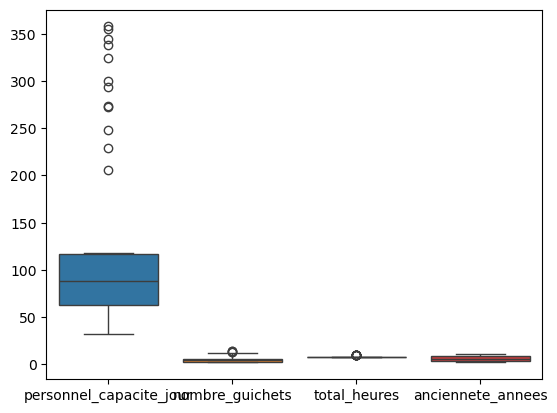

In [264]:
sns.boxplot(centres_services)

# Ici les ouliers son totalement visibles surtou sur la capacite du personnel alors qu'on a en moyenne environ 95-98

In [265]:
centres_services['horaire_nuit'].unique()

array(['Non', 'Oui'], dtype=object)

In [266]:
corr = centres_services.corr(numeric_only=True)

<Axes: >

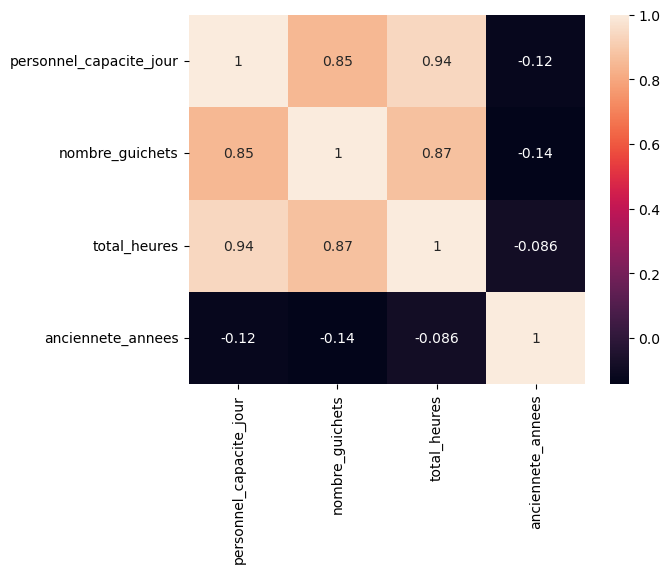

In [267]:
sns.heatmap(corr, annot=True)

**-Total Heures & Capacité (0.94)** : C'est la corrélation la plus élevée. Cela confirme que l'extension des horaires d'ouverture est le levier principal pour augmenter la capacité d'accueil du personnel.

**-Nombre de Guichets & Capacité (0.85)** : Plus un centre possède de guichets, plus sa capacité journalière est forte. C'est une relation logique de dimensionnement physique.

**-Nombre de Guichets & Total Heures (0.87)** : Les centres les mieux équipés (plus de guichets) sont aussi ceux qui restent ouverts le plus longtemps.

**-L'Ancienneté** : Un facteur neutre

La ligne et la colonne anciennete_annees sont très sombres, avec des valeurs proches de zéro ou légèrement négatives (-0.12, -0.14, -0.086) :

L'âge d'un centre n'a aucune influence sur sa taille ou sa performance.


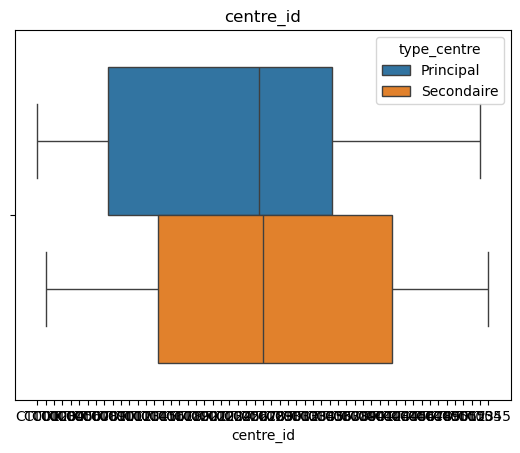

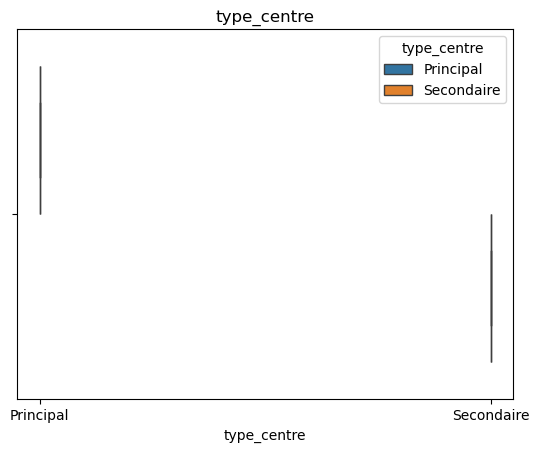

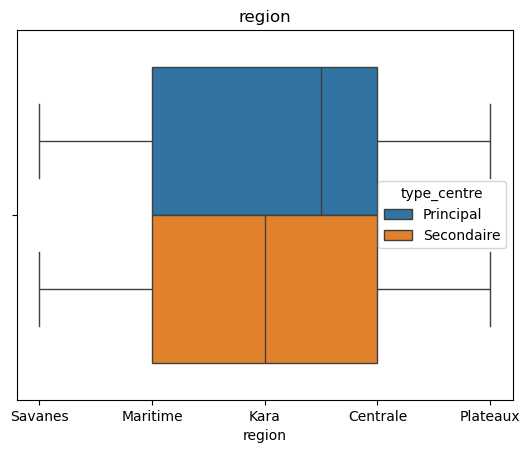

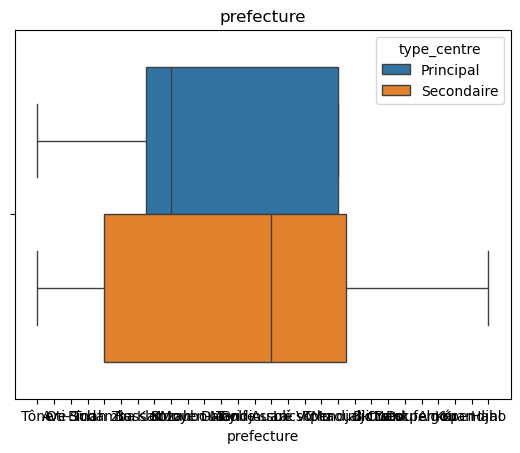

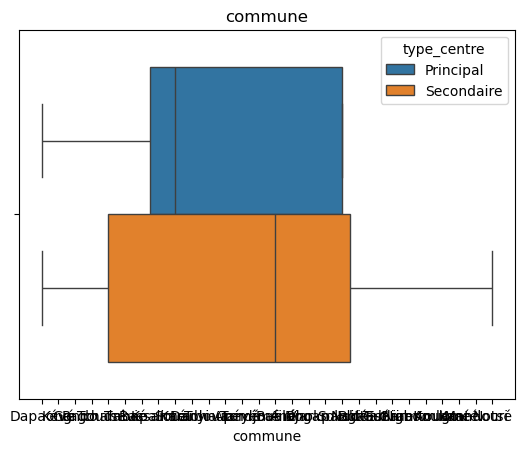

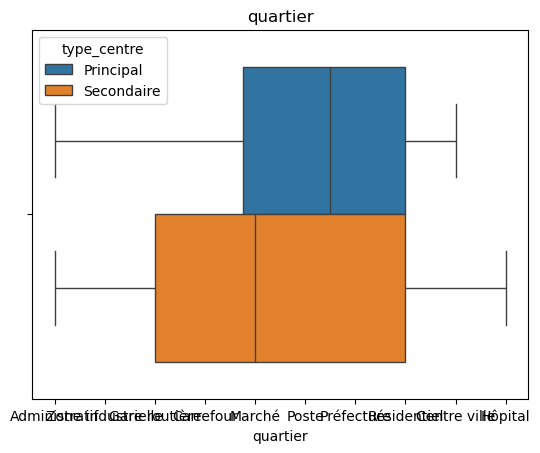

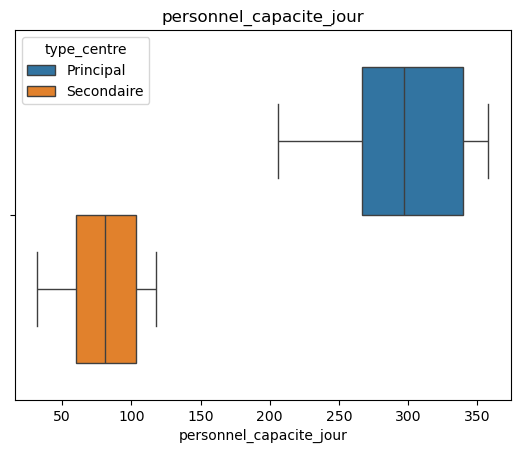

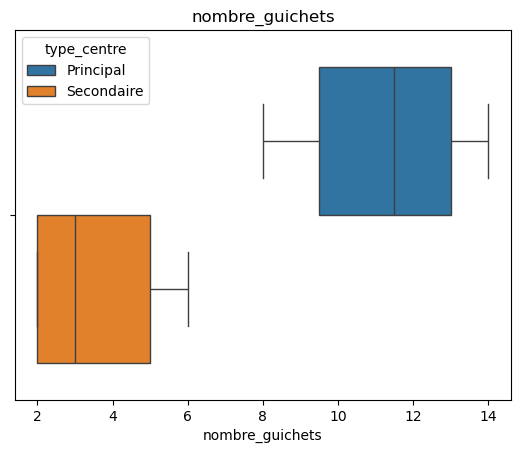

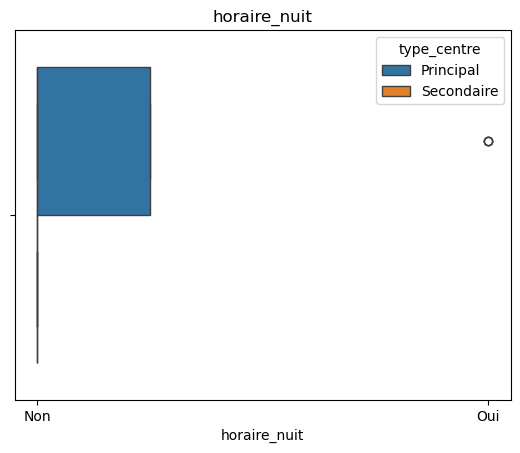

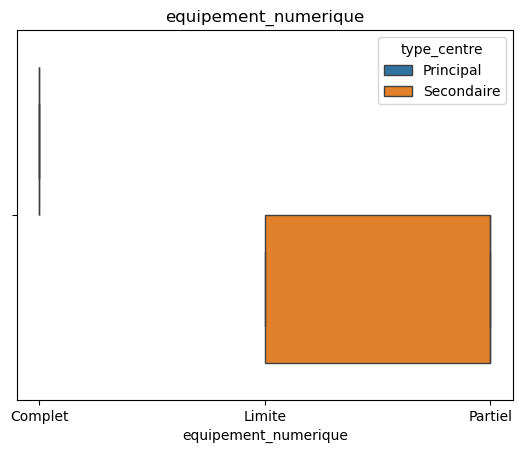

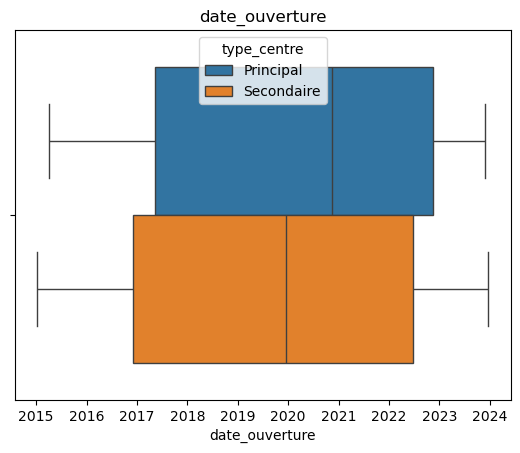

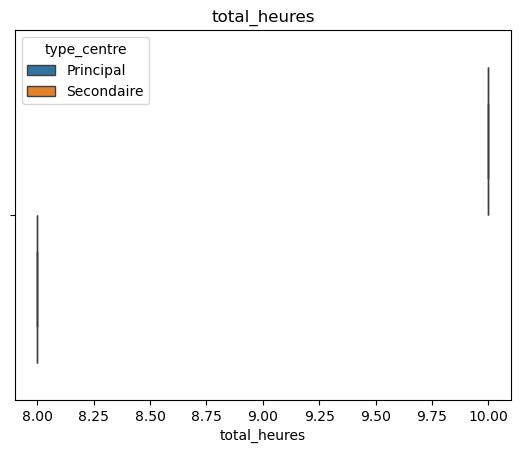

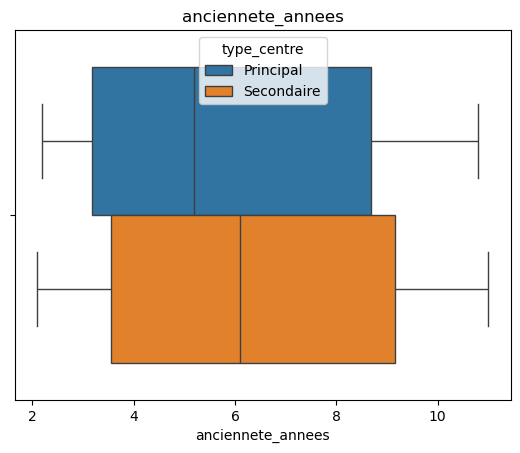

In [268]:
for col in centres_services.columns:
    plt.title(col)
    sns.boxplot(data=centres_services,x=centres_services[col], hue = 'type_centre')
    plt.show()

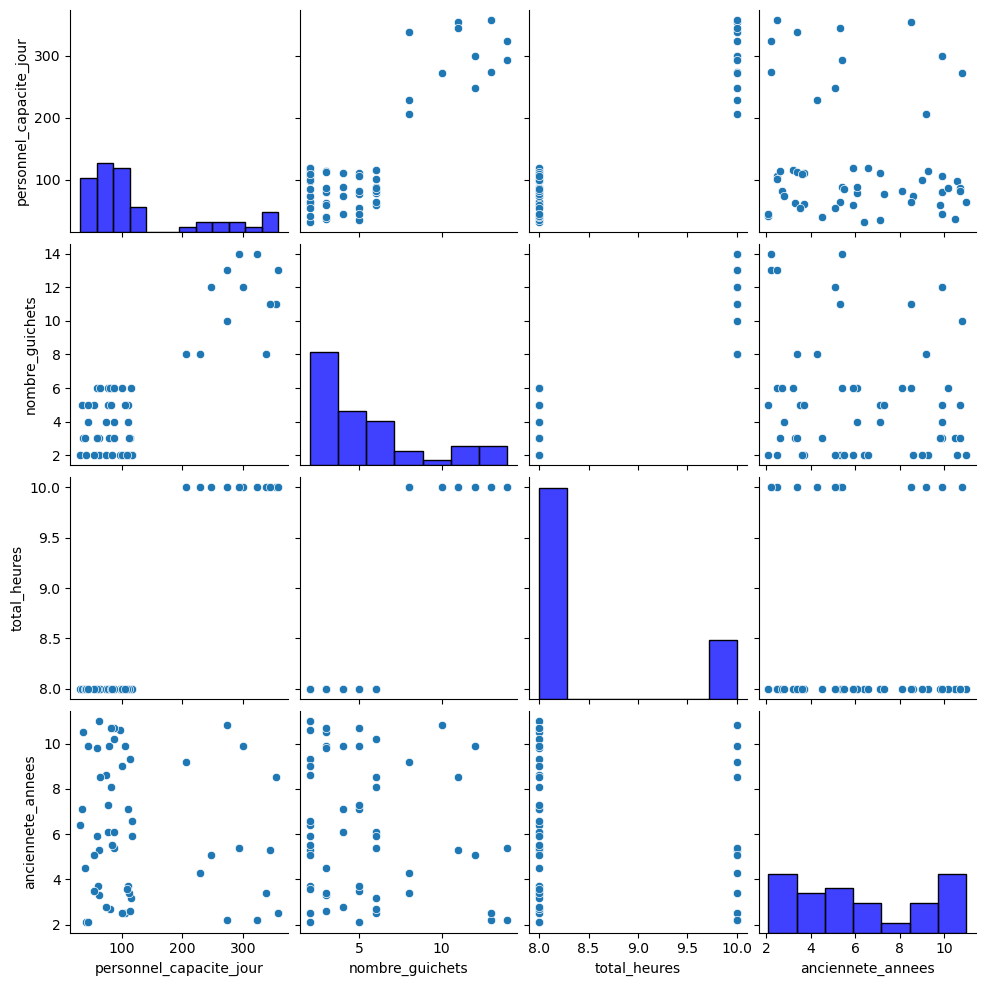

In [269]:
sns.pairplot(data=centres_services, diag_kws={'color': 'blue'})
plt.show()

# Analyse
L'analyse de la linéarité et de la structure des données est ici plus brute mais confirme les observations précédentes

Capacité / Guichets	---> Linéaire positive	: Très élevée

Capacité / Heures	---> Logique de seuil	: Élevée

Guichets / Ancienneté	---> Aléatoire / Uniforme	: Null

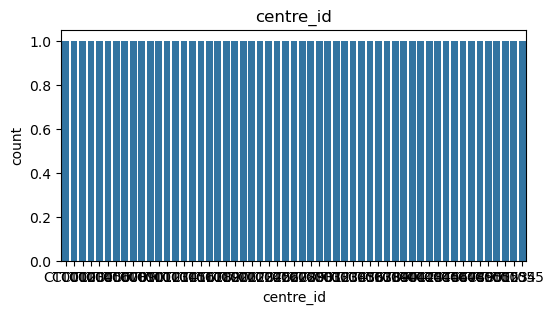

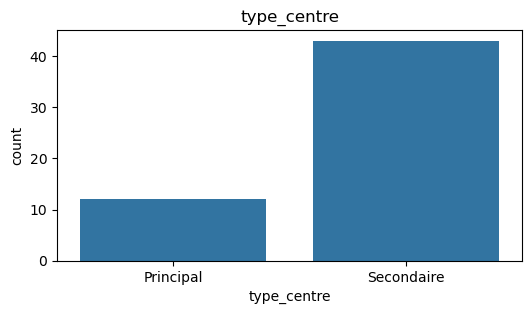

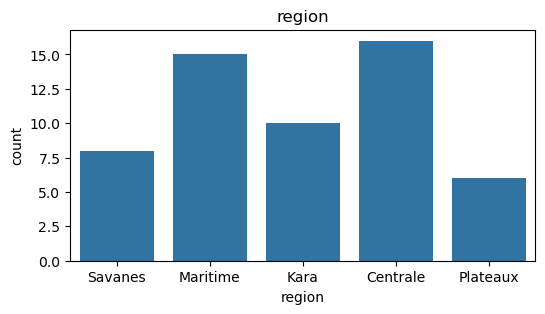

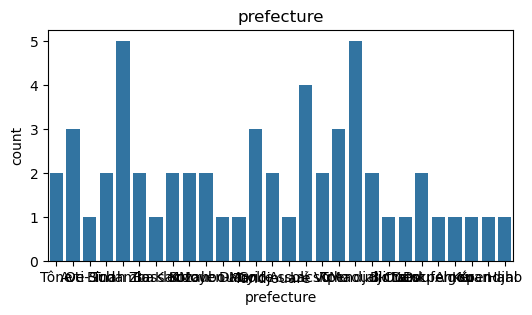

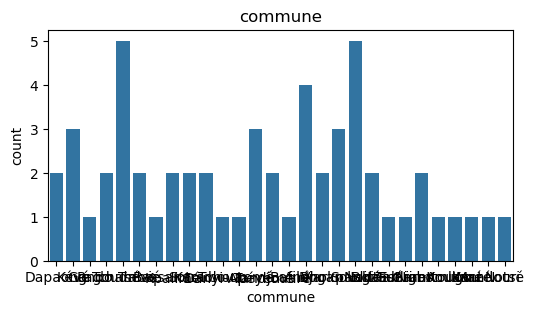

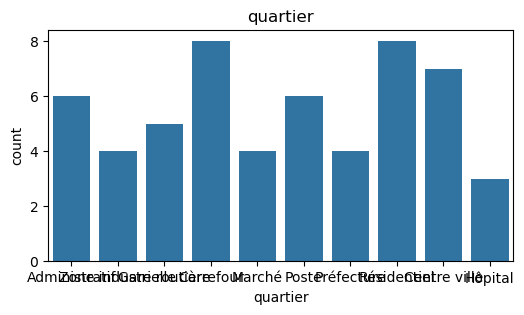

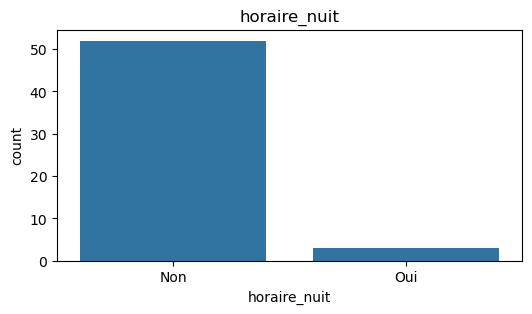

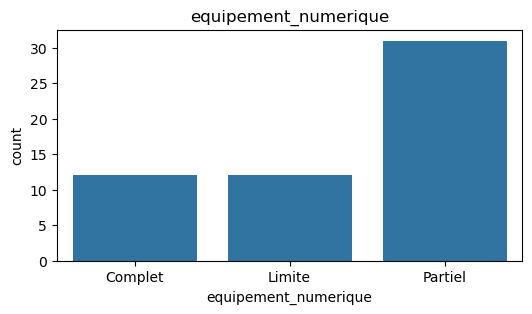

In [270]:
for col in centres_services.select_dtypes(include='object').columns:
    plt.figure(figsize=(6,3))
    sns.countplot(data=centres_services,x=centres_services[col])
    plt.title(col)

# Analyse

-Ici on remarque plus de centres secondaires que de principaux

-Plus d'horaire de jour que de nuits 

-Plus d'equipements partiel que de complet et une limite d'equipement


## Apres analyse le dataset final retenu est : df_centres_services

In [273]:
centres_services.to_csv("df_centres_services.csv")